In [1]:
# importing all the essential libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing , linear_model
from sklearn import utils
from sklearn import svm
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neural_network import MLPRegressor


In [2]:
# loading the dataset Bit_coin in bitcoin_df dataframe
bitcoin_df = pd.read_csv ('Bit_coin.csv')

# Introduce date column by converting timestamp to datetime as its value
bitcoin_df = bitcoin_df.assign(date= pd.to_datetime(bitcoin_df.Timestamp, unit='s'))

# Sort the dataframe bitcoin_df by column date
bitcoin_df = bitcoin_df.sort_values(by='date')

# Print dataframe
bitcoin_df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,date
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31 07:52:00
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:53:00
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:54:00
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:55:00
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:56:00
...,...,...,...,...,...,...,...,...,...
3997692,1565567760,11555.57,11555.57,11540.37,11540.58,0.036868,425.909106,11552.336234,2019-08-11 23:56:00
3997693,1565567820,11553.49,11556.22,11553.49,11556.22,0.623462,7204.428272,11555.520505,2019-08-11 23:57:00
3997694,1565567880,11559.73,11561.22,11546.77,11561.22,0.159070,1838.731403,11559.252199,2019-08-11 23:58:00
3997695,1565567940,11559.73,11589.73,11528.73,11528.73,16.198210,187504.635170,11575.638889,2019-08-11 23:59:00


In [5]:
# Drop Na values from the dataframe
bitcoin_df = bitcoin_df.dropna(how='any',axis=0)

In [6]:
#Split the dataframe that consists data from 2011-2019 into two sets 2011-18 and 2019

# Assign split date 
split_date ='2018-12-31'

# Assign data from 2011-18 in training_set, which will be used for fitting the model
training_set= bitcoin_df[bitcoin_df['date']<=split_date]

# Assign data from 2019 in test_set, which will then be used as a new data on the trained model that gives best prediction
test_set = bitcoin_df[bitcoin_df['date']>split_date]

# Load the dataframe with 2011-2018 data
bit_df = training_set

# Print dataframe 
bit_df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,date
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31 07:52:00
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,2011-12-31 15:50:00
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,2011-12-31 16:59:00
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,2011-12-31 17:00:00
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,2012-01-01 04:16:00
...,...,...,...,...,...,...,...,...,...
3675132,1546214160,3826.22,3826.22,3825.52,3825.52,2.533121,9692.255048,3826.210847,2018-12-30 23:56:00
3675133,1546214220,3827.17,3832.44,3824.70,3827.55,5.566741,21298.724122,3826.066960,2018-12-30 23:57:00
3675134,1546214280,3827.55,3827.55,3827.55,3827.55,0.369269,1413.394451,3827.550000,2018-12-30 23:58:00
3675135,1546214340,3831.02,3835.79,3830.60,3835.79,1.999535,7660.289917,3831.034985,2018-12-30 23:59:00


In [7]:
# Convert Timestamp to datetime 
bit_df.Timestamp = pd.to_datetime(bit_df.Timestamp, unit='s')

# print dataframe
print(bit_df)


                  Timestamp     Open     High      Low    Close  Volume_(BTC)  \
0       2011-12-31 07:52:00     4.39     4.39     4.39     4.39      0.455581   
478     2011-12-31 15:50:00     4.39     4.39     4.39     4.39     48.000000   
547     2011-12-31 16:59:00     4.50     4.57     4.50     4.57     37.862297   
548     2011-12-31 17:00:00     4.58     4.58     4.58     4.58      9.000000   
1224    2012-01-01 04:16:00     4.58     4.58     4.58     4.58      1.502000   
...                     ...      ...      ...      ...      ...           ...   
3675132 2018-12-30 23:56:00  3826.22  3826.22  3825.52  3825.52      2.533121   
3675133 2018-12-30 23:57:00  3827.17  3832.44  3824.70  3827.55      5.566741   
3675134 2018-12-30 23:58:00  3827.55  3827.55  3827.55  3827.55      0.369269   
3675135 2018-12-30 23:59:00  3831.02  3835.79  3830.60  3835.79      1.999535   
3675136 2018-12-31 00:00:00  3831.03  3842.89  3831.03  3832.98     15.872787   

         Volume_(Currency) 

D:\IDE\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [8]:
## Re-sampling the dataframe to Daily frequency
bit_df.index = bit_df.Timestamp
bit_df = bit_df.resample('D').mean()

## Re-sampling the dataframe to Monthly frequency
bitcoin_monthly_df = bit_df.resample('M').mean()

## Re-sampling the dataframe to Annual frequency
bitcoin_annual_df = bit_df.resample('A-DEC').mean()

## Re-sampling the dataframe to Quaterly frequency
bitcoin_quaterly_df = bit_df.resample('Q-DEC').mean()

# Reset the index position of Timestamp column
bit_df.reset_index(drop=False, inplace=True)

D:\IDE\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


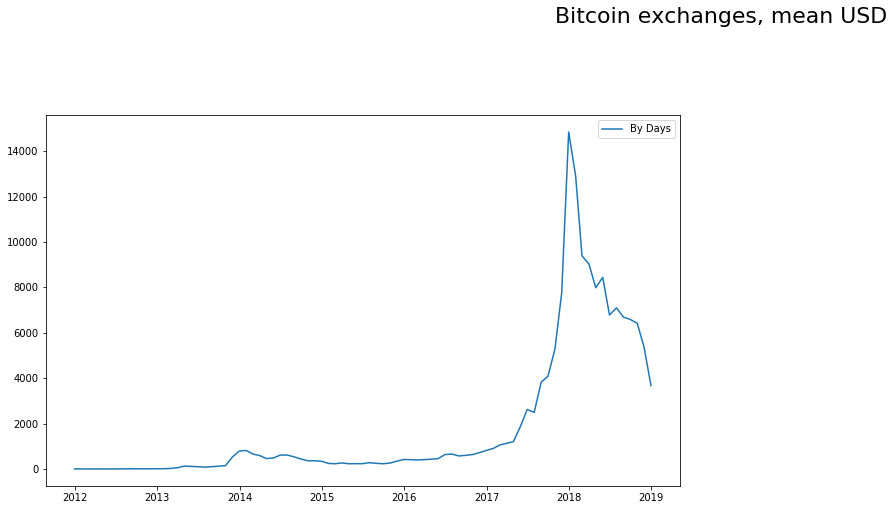

In [9]:
## Visualization of dataset

# Set the figure size
fig = plt.figure(figsize=[25, 15])

# Set the title of the figure
plt.suptitle('Bitcoin exchanges, mean USD', fontsize=22)
plt.subplot(221)

# Using monthly dataframe plot the Weighted_Price of the datset
plt.plot(bitcoin_monthly_df.Weighted_Price, '-', label='By Days')
plt.legend()


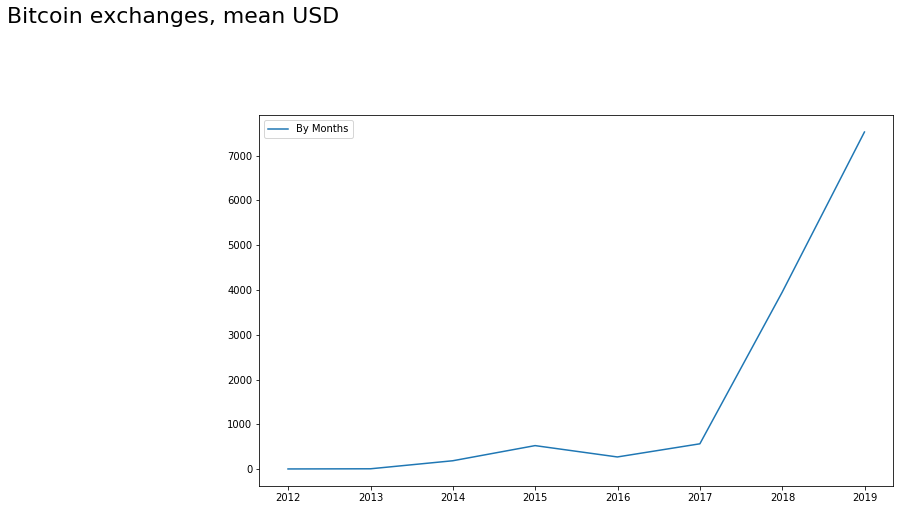

In [10]:
## Visualization of dataset

# Set the figure size
fig = plt.figure(figsize=[25, 15])

# Set the title of the figure
plt.suptitle('Bitcoin exchanges, mean USD', fontsize=22)
plt.subplot(222)

# Using annual dataframe plot the Weighted_Price of the datset
plt.plot(bitcoin_annual_df.Weighted_Price, '-', label='By Months')
plt.legend()


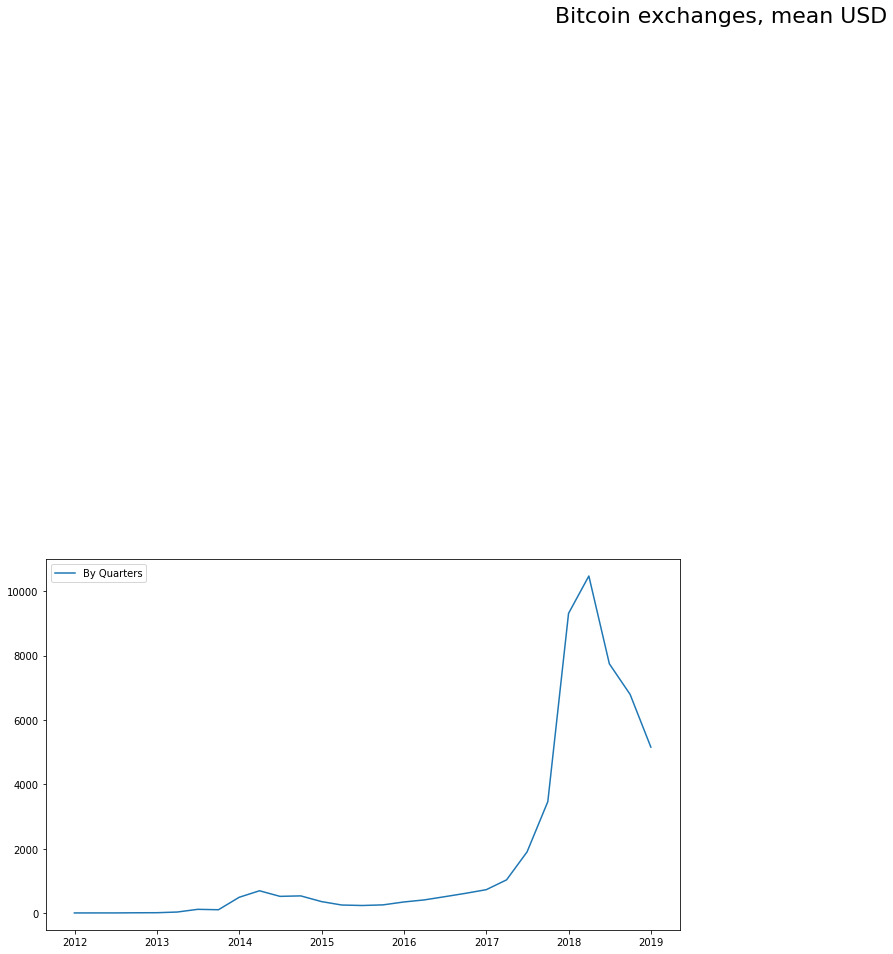

In [11]:
## Visualization of dataset

# Set the figure size
fig = plt.figure(figsize=[25, 15])

# Set the title of the figure
plt.suptitle('Bitcoin exchanges, mean USD', fontsize=22)
plt.subplot(223)

# Using quaterly dataframe plot the Weighted_Price of the datset
plt.plot(bitcoin_quaterly_df.Weighted_Price, '-', label='By Quarters')
plt.legend()

In [12]:
# Preprocessing the data for fititng

# Load the independent variable X with all the columns except target column, Weighted_Price
X = bit_df.iloc[:,[1,2,3,4,5,6]].astype(float)

# Load the independent variable X with target column, Weighted_Price
y = bit_df.iloc[:,-1].values.reshape(-1,1)

In [13]:
# Scale the data using preprocessing lib of sklearn
sc_X = StandardScaler()
sc_y = StandardScaler()

# Transform the data
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [14]:
# Shape the independent variable data after preprocessing
X.shape

(2558, 6)

In [15]:
# Shape the dependent variable data after preprocessing
y.shape

(2558, 1)

In [16]:
# Split the data using train_test_split.

# Split in the proportion of 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [17]:
# Check for any null values 
np.isnan(X_train).any(), np.isnan(y_train).any(), np.isnan(X_test).any()

(True, True, True)

In [18]:
# drop all the na values in traing and testing dependent and independent variables
X_train[np.isnan(X_train)] = np.median(X_train[~np.isnan(X_train)])
y_train[np.isnan(y_train)] = np.median(y_train[~np.isnan(y_train)])
X_test[np.isnan(X_test)] = np.median(X_test[~np.isnan(X_test)])
y_test[np.isnan(y_test)] = np.median(y_test[~np.isnan(y_test)])

In [19]:
# Run Linear Regression model
lr_model = linear_model.LinearRegression()

# Fit the data 
lr_model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
#Run Support Vector Regression model
svr_model = svm.SVR(kernel = 'rbf', gamma = 0.0001,  C=1e3)

# Fit the data 
svr_model.fit(X_train, y_train)


D:\IDE\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [21]:
# Run Multi Layer Perceptron
mlp = MLPRegressor(hidden_layer_sizes=(3,2,2),random_state=2018)

# Fit the data 
mlp.fit( X_train , y_train )

D:\IDE\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\IDE\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(3, 2, 2), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=2018, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [22]:
# Prediction using the trained models
y_predict_svr = svr_model.predict(X_test)

y_predict_lr=lr_model.predict(X_test)

y_predict_mlp=mlp.predict(X_test)

In [24]:
# SVR PREDICTIONS
y_predict_svr

array([-3.37518646e-01,  6.99396192e-01,  1.54802848e+00,  7.93490029e-01,
       -5.41845135e-01, -4.39719032e-01, -4.33770319e-01, -3.64830906e-01,
       -1.08514903e-01,  2.68041362e-01,  1.23271714e+00,  2.86652682e-01,
       -3.78537784e-01, -4.32943675e-01,  7.85061498e-01,  1.69158357e+00,
        1.44151249e+00, -3.39244501e-01, -4.19742280e-01,  1.50214317e+00,
       -4.30540655e-01, -3.76072061e-01, -3.11547602e-01, -4.50315246e-01,
       -4.46097989e-01, -4.45171514e-01, -5.52023343e-01, -5.18101155e-01,
       -3.94484214e-01, -4.39733407e-01, -4.21928629e-01, -4.25799061e-01,
       -2.33726585e-01, -2.65663899e-01,  2.39531759e+00,  1.80147873e+00,
       -3.66702218e-01, -4.07938389e-01, -4.35822438e-01, -5.53382555e-01,
       -4.35738205e-01,  2.58538272e+00,  1.57397583e+00, -3.99047700e-01,
       -4.35174992e-01, -5.04309212e-01, -5.86172389e-02, -5.54651204e-01,
       -9.88295455e-02, -5.60659577e-01, -3.16435178e-01, -4.26621708e-01,
       -4.78708157e-01,  

In [23]:
# LINER REGRESSION PREDICTIONS
y_predict_lr

array([[-0.38955232],
       [ 0.6045268 ],
       [ 1.49156809],
       [ 0.72916548],
       [-0.57930696],
       [-0.51416996],
       [-0.50977798],
       [-0.45284399],
       [-0.20336275],
       [ 0.18455622],
       [ 1.1615781 ],
       [ 0.20111276],
       [-0.46302028],
       [-0.47818826],
       [ 0.69438116],
       [ 1.65742858],
       [ 1.38023446],
       [-0.39243786],
       [-0.49660347],
       [ 1.44868364],
       [-0.49967365],
       [-0.46166718],
       [-0.40341878],
       [-0.51964715],
       [-0.51948026],
       [-0.51877728],
       [-0.58533963],
       [-0.56225207],
       [-0.44672674],
       [-0.51122221],
       [-0.50660676],
       [-0.49968205],
       [-0.33041258],
       [-0.35286479],
       [ 2.37744624],
       [ 1.75788811],
       [-0.45258457],
       [-0.46911983],
       [-0.51140633],
       [-0.58483054],
       [-0.5072778 ],
       [ 2.57770068],
       [ 1.52378042],
       [-0.48306464],
       [-0.51067031],
       [-0

In [24]:
# MLP PREDICTIONS
y_predict_mlp

array([-0.38605083,  0.60852927,  1.47383582,  0.82695709, -0.567871  ,
       -0.53639299, -0.51065425, -0.46685273, -0.16142648,  0.28951397,
        1.1475238 ,  0.14472908, -0.47147097, -0.472827  ,  0.77132286,
        1.67350136,  1.36757953, -0.38739946, -0.50807363,  1.51947101,
       -0.47431918, -0.4685373 , -0.40333249, -0.54043923, -0.53225314,
       -0.52598718, -0.55956779, -0.54724721, -0.45528238, -0.52669153,
       -0.49544685, -0.72675943, -0.31086509, -0.33647204,  2.0113812 ,
        1.75739268, -0.46070015, -0.4600627 , -0.53568726, -0.55824333,
       -0.5260701 ,  2.0113812 ,  1.5249719 , -0.46030121, -0.52896049,
       -0.52931277, -0.09472377, -0.60447848, -0.15068231, -0.59949299,
       -0.40676272, -0.51736824, -0.53088598,  1.49126323, -0.40454572,
       -0.23066379, -0.50654585,  1.7752735 , -0.44115204, -0.62892132,
       -0.56253556, -0.33586986, -0.20728255, -0.39211005, -0.59080689,
       -0.27135661,  0.31053005, -0.53473585, -0.72675943, -0.61

In [26]:
# Performance Metrics of Linear Regression model

print(mean_squared_error(y_test, y_predict_lr))
print(mean_absolute_error(y_test, y_predict_lr))
print(r2_score(y_test, y_predict_lr))

1.6370420490988584e-06
0.00010517623747105509
0.9999982951144094


In [27]:
# Performance Metrics of MLP model

print(mean_squared_error(y_test, y_predict_mlp))
print(mean_absolute_error(y_test, y_predict_mlp))
print(r2_score(y_test, y_predict_mlp))

0.09022904783087539
0.07640412513272361
0.9060316113541758


In [28]:
# Performance Metrics of SVR model

# r2_score of SVR
y_test[np.isnan(y_test)] = np.median(y_test[~np.isnan(y_test)])
acc1 = r2_score(y_test, y_predict_svr)
acc1

0.9971088673651969

In [29]:
# mean squared error of SVR
mse = mean_squared_error(y_test, y_predict_svr)
mse

0.0027760840485865287

In [30]:
# root mean square error
rmse = np.sqrt(mse)
rmse

0.052688557093419526

In [31]:
# Predicting the bitcoin values for 2019..

# loading the 2019 data as new data in bitcoin_testing to evaluate the accuracy of the trained models
bitcoin_testing = test_set

# Convert Timestamp column into datetime
bitcoin_testing.Timestamp = pd.to_datetime(bitcoin_testing.Timestamp, unit='s')

# Print dataframe
print(bitcoin_testing)


                  Timestamp      Open      High       Low     Close  \
3675137 2018-12-31 00:01:00   3830.72   3830.79   3816.65   3823.24   
3675138 2018-12-31 00:02:00   3821.84   3823.71   3818.46   3818.95   
3675139 2018-12-31 00:03:00   3824.48   3827.76   3821.25   3824.48   
3675140 2018-12-31 00:04:00   3825.62   3826.93   3825.62   3826.93   
3675141 2018-12-31 00:05:00   3826.49   3828.81   3826.49   3828.81   
...                     ...       ...       ...       ...       ...   
3997692 2019-08-11 23:56:00  11555.57  11555.57  11540.37  11540.58   
3997693 2019-08-11 23:57:00  11553.49  11556.22  11553.49  11556.22   
3997694 2019-08-11 23:58:00  11559.73  11561.22  11546.77  11561.22   
3997695 2019-08-11 23:59:00  11559.73  11589.73  11528.73  11528.73   
3997696 2019-08-12 00:00:00  11527.44  11551.57  11520.00  11520.00   

         Volume_(BTC)  Volume_(Currency)  Weighted_Price                date  
3675137     14.232735       54441.800648     3825.111763 2018-12-31 

D:\IDE\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [32]:
## Re-sampling dataframe to Daily frequency
bitcoin_testing.index = bitcoin_testing.Timestamp
bitcoin_testing = bitcoin_testing.resample('D').mean()

## Re-sampling dataframe to Monthly frequency
bitcoin_monthly_df = bitcoin_testing.resample('M').mean()

## Re-sampling dataframe to Annual frequency
bitcoin_annual_df = bitcoin_testing.resample('A-DEC').mean()

## Re-sampling dataframe to Quaterly frequency
bitcoin_quaterly_df = bitcoin_testing.resample('Q-DEC').mean()

# Print daily dataframe
bitcoin_testing

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2018-12-31,3756.655917,3758.256403,3755.081105,3756.725141,5.212610,19553.198006,3756.547313
2019-01-01,3700.596410,3702.094697,3699.468582,3700.783287,4.220989,15663.481588,3700.678699
2019-01-02,3824.173719,3825.869658,3822.936859,3824.518114,4.208722,16124.785439,3824.381088
2019-01-03,3829.148762,3830.350047,3828.065627,3829.362853,3.764299,14372.040673,3829.104391
2019-01-04,3784.278187,3785.747343,3783.116410,3784.540474,5.515958,20888.264006,3784.333248
...,...,...,...,...,...,...,...
2019-08-08,11802.089256,11808.993252,11794.461369,11802.458499,7.049661,83148.905377,11801.348742
2019-08-09,11820.178077,11826.725247,11813.025645,11820.708334,5.112833,60408.960125,11819.342193
2019-08-10,11579.977053,11584.982614,11573.482812,11579.683736,5.289239,61001.259165,11578.771029


In [33]:
# Preprocessing the data for testing

# Load the independent variable X with all the columns except target column, Weighted_Price

X_testing = bitcoin_testing.iloc[:,[1,2,3,4,5,6]].astype(float)

# Load the independent variable X with,target column, Weighted_Price
Y_testing =bitcoin_testing.iloc[:,-1].values.reshape(-1,1)

In [34]:
# Scale the data using preprocessing lib of sklearn
sc_X = StandardScaler()

# Tranform the data 
X_testing = sc_X.fit_transform(X_testing)
Y_testing = sc_X.fit_transform(Y_testing)

In [35]:
# Check for any null values 
X_testing[np.isnan(X_testing)] = np.median(X_testing[~np.isnan(X_testing)])
Y_testing[np.isnan(Y_testing)] = np.median(Y_testing[~np.isnan(Y_testing)])

In [60]:
# Predict using the SVR model since it was our best trained model
y_predict_testing=svr_model.predict(X_testing)

In [61]:
# print the predicted data
y_predict_testing

array([-0.71935905, -0.78904235, -0.75912596, -0.78290248, -0.69542328,
       -0.82356211, -0.7319019 , -0.63731885, -0.46123857, -0.64573982,
       -0.35993308, -0.61620786, -0.8884495 , -0.77591939, -0.63515648,
       -0.69350189, -0.73175228, -0.73892455, -0.83147276, -0.84538146,
       -0.79422291, -0.81836711, -0.76182765, -0.7899339 , -0.86624571,
       -0.84631422, -0.930683  , -0.88496795, -0.6675469 , -0.79423538,
       -0.84996638, -0.84845967, -0.81707185, -0.95391628, -0.964978  ,
       -0.95234676, -0.91655339, -0.84170708, -0.918981  , -0.48871397,
       -0.87600765, -0.86855839, -0.72168276, -0.64030065, -0.71372367,
       -0.8074047 , -0.79236184, -0.89640005, -0.82581707, -0.39223704,
       -0.48077611, -0.5763871 , -0.64498125, -0.69315307, -0.60024559,
       -0.39898582, -0.6420031 , -0.73175895, -0.68907137, -0.7222382 ,
       -0.79624985, -0.85154509, -0.87725841, -0.71593567, -0.69944628,
       -0.71573467, -0.66085049, -0.6590362 , -0.74938224, -0.83

In [62]:
# print the actual data from 2019 dataset for comparison 
Y_testing

array([[-0.93443106],
       [-0.95335514],
       [-0.91145408],
       [-0.90985418],
       [-0.92501928],
       [-0.90815023],
       [-0.89080876],
       [-0.84437891],
       [-0.84965667],
       [-0.84846409],
       [-0.92241013],
       [-0.97503281],
       [-0.97853737],
       [-0.99582059],
       [-0.99334978],
       [-0.97380915],
       [-0.98627548],
       [-0.98640376],
       [-0.98237113],
       [-0.96169784],
       [-0.98726539],
       [-1.00917231],
       [-1.00366744],
       [-0.99799548],
       [-1.0028976 ],
       [-1.00221385],
       [-0.99702656],
       [-1.00620469],
       [-1.04268951],
       [-1.05592137],
       [-1.04706433],
       [-1.04697522],
       [-1.04958146],
       [-1.04433035],
       [-1.04679392],
       [-1.05048127],
       [-1.04865896],
       [-1.06493154],
       [-1.06665885],
       [-1.03630063],
       [-0.98242715],
       [-0.98479678],
       [-0.98910568],
       [-0.99495219],
       [-0.99356349],
       [-0

In [63]:
# Accuracy of the prediction 
r2_score(Y_testing,y_p
         redict_testing)

0.9248378476879672

In [64]:
# mean squared error of prediction
mse_testing = mean_squared_error(Y_testing, y_predict_testing)
mse_testing

0.07516215231203284

In [65]:
# root mean square error of prediction
rmse_testing = np.sqrt(mse_testing)
rmse_testing

0.2741571671724685

ValueError: cannot insert level_0, already exists

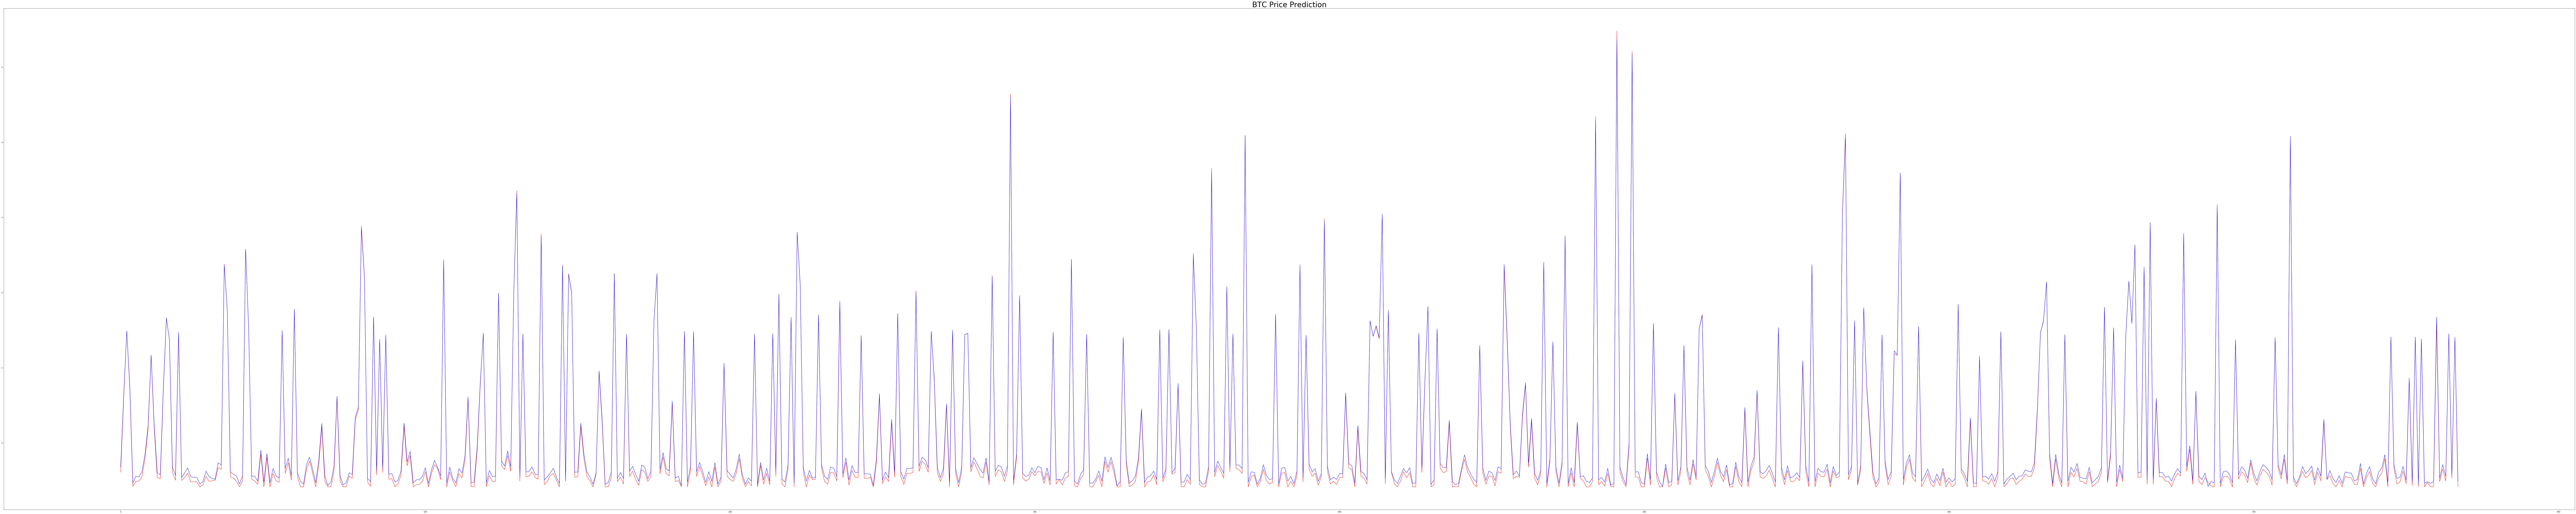

In [67]:
#Plot Graph of actual vs predicted values from the trained model
# [y_test, y_predict_svr]

# Visualising the results
plt.figure(figsize=(250,50), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(y_test, color = 'red', label = 'Real BTC Price')
plt.plot(y_predict_svr, color = 'blue', label = 'Predicted BTC Price')
plt.title('BTC Price Prediction', fontsize=40)
bit_df = bit_df.reset_index()
x=bit_df.index
labels = bit_df['Timestamp']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()